In [92]:
import pandas as pd
import numpy as np

# read the data file from GitHub and convert to a NumPy ndarray object
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv" 
hflights = pd.read_csv(filename)
hflights

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0
5,2011,1,6,4,1359.0,1503.0,AA,428,N262AA,64.0,...,-7.0,-1.0,IAH,DFW,224,6.0,13.0,0,NaN,0
6,2011,1,7,5,1359.0,1509.0,AA,428,N493AA,70.0,...,-1.0,-1.0,IAH,DFW,224,12.0,15.0,0,NaN,0
7,2011,1,8,6,1355.0,1454.0,AA,428,N477AA,59.0,...,-16.0,-5.0,IAH,DFW,224,7.0,12.0,0,NaN,0
8,2011,1,9,7,1443.0,1554.0,AA,428,N476AA,71.0,...,44.0,43.0,IAH,DFW,224,8.0,22.0,0,NaN,0
9,2011,1,10,1,1443.0,1553.0,AA,428,N504AA,70.0,...,43.0,43.0,IAH,DFW,224,6.0,19.0,0,NaN,0


Ｑuestion2:
    
Which flight has the longest average delay-time,and how long is it?

we think passengers would take care of this information more, as long as they know which flight has the longest average delay-time, 
they may avoid choosing it and improve their travel experience.

Narrative for transformations:
    
At first,remove some columns that we do not use in this question.
To get the average delay-time, we need to we create a new column called totaltime_delay to store the sum of ArrDelay and DepDelay.
And then we should use groupby to category the each flight and get their mean.Finally use max to get the maximum average delay time. 

In [146]:
#remove some columns that we do not use in this question.
#create a new column called totaltime_delay to store the sum of ArrDelay and DepDelay

dhflights = hflights.drop(columns = ['DayOfWeek','DepTime','ArrTime','UniqueCarrier','FlightNum','ActualElapsedTime','AirTime','Distance','TaxiIn','TaxiOut','CancellationCode','Diverted','Origin','Dest','Cancelled'])

dhflights['Totaltime_delay'] = dhflights['ArrDelay'] + dhflights['DepDelay']

dhflights

,Year,Month,DayofMonth,TailNum,ArrDelay,DepDelay,Totaltime_delay
0,2011,1,1,N576AA,-10.0,0.0,-10.0
1,2011,1,2,N557AA,-9.0,1.0,-8.0
2,2011,1,3,N541AA,-8.0,-8.0,-16.0
3,2011,1,4,N403AA,3.0,3.0,6.0
4,2011,1,5,N492AA,-3.0,5.0,2.0
5,2011,1,6,N262AA,-7.0,-1.0,-8.0
6,2011,1,7,N493AA,-1.0,-1.0,-2.0
7,2011,1,8,N477AA,-16.0,-5.0,-21.0
8,2011,1,9,N476AA,44.0,43.0,87.0
9,2011,1,10,N504AA,43.0,43.0,86.0


In [150]:
#after get the total delay time, we should group by each flight and get their average delay time by different TailNum.
#And store the mean result to a new datafram called mean_dhflights

mean_dhflights =dhflights.groupby('TailNum').mean()
mean_dhflights

,Year,Month,DayofMonth,ArrDelay,DepDelay,Totaltime_delay
TailNum,,,,,,
N0EGMQ,2011.0,1.00000,25.666667,23.333333,26.666667,50.000000
N10156,2011.0,1.00000,12.562500,4.093750,3.718750,7.812500
N11106,2011.0,1.00000,18.666667,-2.083333,-2.583333,-4.666667
N11107,2011.0,1.00000,21.846154,12.230769,11.923077,24.153846
N11109,2011.0,1.00000,18.045455,1.045455,1.409091,2.454545
N11113,2011.0,1.00000,7.157895,-3.789474,1.421053,-2.368421
N11119,2011.0,1.00000,15.636364,6.250000,3.787879,10.125000
N11121,2011.0,1.00000,14.290323,4.129032,4.000000,8.129032
N11127,2011.0,1.00000,15.233333,12.700000,13.600000,26.300000


#a written narrative that explains my data analysis 

To show the exploratory data analysis, we choose to generate a plot to show the average delay time for each flight

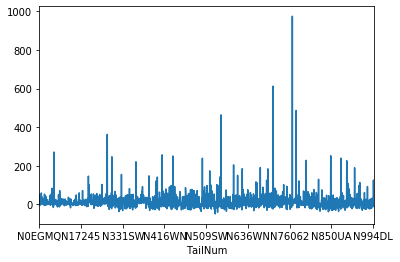

In [170]:
# create a plot of mean_dhflights' average 'Totaltime_delay' column's values 

mean_dhflights.Totaltime_delay.plot()

From the plot,  we can see the average delay time for each flight.And most of the average delay time of flights are below the 200. 
The highest value is close to 1000 which is our max average delay time.And the corresponging X is our TailNum.And we can get the actual
max average delay time value as follows:

In [158]:
#retrieve a datafram called mean_TailNum_max to show the max average Totaltime_delay

mean_TailNum_max = mean_dhflights[mean_dhflights['Totaltime_delay'] == max(mean_dhflights['Totaltime_delay'])]
mean_TailNum_max

,Year,Month,DayofMonth,ArrDelay,DepDelay,Totaltime_delay
TailNum,,,,,,
N762NC,2011.0,1.0,15.0,487.0,488.0,975.0


In [172]:
#So from we can get the result of the the max average totaltime_delay and it's flight name
#Get the flight name of the max average Totaltime_delay

print('the max average totaltime_delay:',max(mean_dhflights['Totaltime_delay']))

print('the flight has the max average delay-time is: ',mean_TailNum_max.index)

the max average totaltime_delay: 975.0
the flight has the max average delay-time is:  Index(['N762NC'], dtype='object', name='TailNum')
